## Exploratory Data Analysis (EDA):

### Import Liabraries :

In [390]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Our classic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Load the dataset into a pandas DataFrame:

In [391]:
data_path = "../raw_data/aw_fb_data.csv"

df = pd.read_csv(data_path)

df

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,3666,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [392]:
df.shape

(6264, 20)

In [393]:
df.dtypes

Unnamed: 0                int64
X1                        int64
age                       int64
gender                    int64
height                  float64
weight                  float64
steps                   float64
hear_rate               float64
calories                float64
distance                float64
entropy_heart           float64
entropy_setps           float64
resting_heart           float64
corr_heart_steps        float64
norm_heart              float64
intensity_karvonen      float64
sd_norm_heart           float64
steps_times_distance    float64
device                   object
activity                 object
dtype: object

In [394]:
df.columns

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [395]:
df['activity'].unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [396]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


### Data Cleaning :

In [397]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'X1'], axis=1, inplace=True)
df1.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [398]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [399]:
df1.rename(columns={'hear_rate': 'heart_rate', 'entropy_setps': 'entropy_steps'}, inplace=True)

df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'age'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'height'),
  Text(3, 0, 'weight'),
  Text(4, 0, 'steps'),
  Text(5, 0, 'heart_rate'),
  Text(6, 0, 'calories'),
  Text(7, 0, 'distance'),
  Text(8, 0, 'entropy_heart'),
  Text(9, 0, 'entropy_steps'),
  Text(10, 0, 'resting_heart'),
  Text(11, 0, 'corr_heart_steps'),
  Text(12, 0, 'norm_heart'),
  Text(13, 0, 'intensity_karvonen'),
  Text(14, 0, 'sd_norm_heart'),
  Text(15, 0, 'steps_times_distance')])

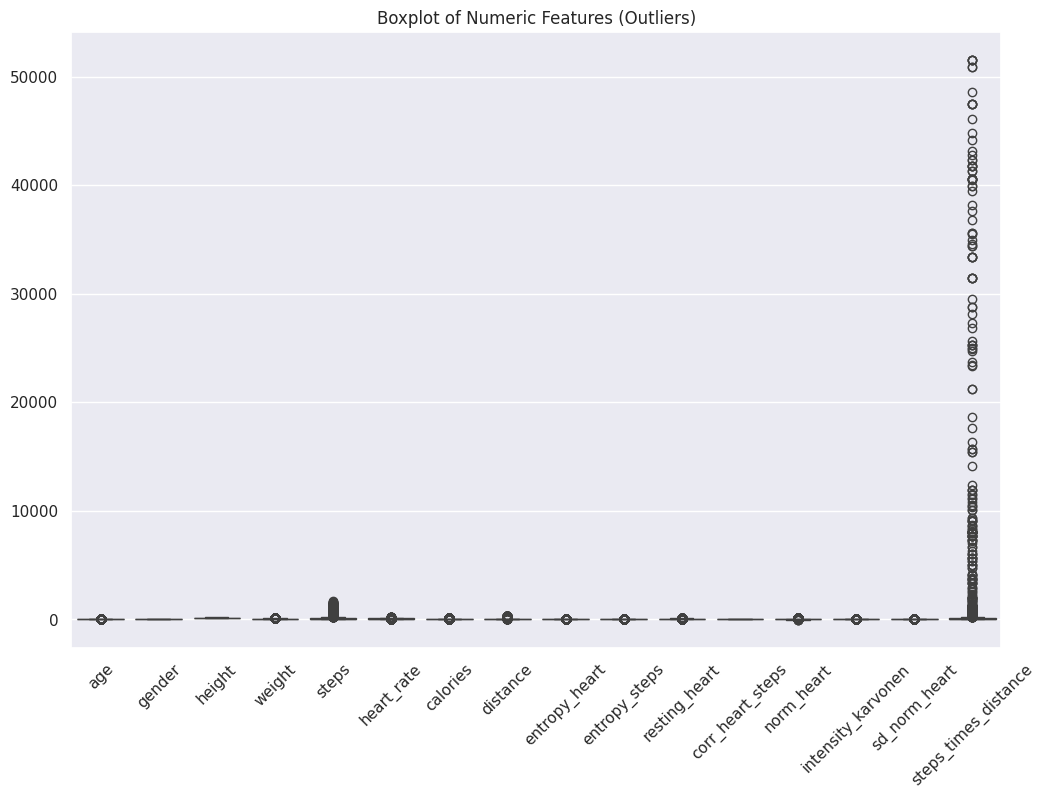

In [400]:
numeric_columns = df1.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Features (Outliers)')
plt.xticks(rotation=45)

In [401]:
df1.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_steps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

In [402]:
df1 = df1.dropna()

In [403]:
print(df1.duplicated().sum())

10


### Splitting Data as Apple and Fitbit :

In [404]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [405]:
df1_apple.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [406]:
df1_fitbit.head()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
3656,20,1,168.0,65.4,1.0,132.000000,1.0,1.0,5.938588,2.179799,130.428571,1.000000,1.571429,0.022587,1.000000,1.0,fitbit,Lying
3657,20,1,168.0,65.4,1.0,132.777778,1.0,1.0,5.938588,2.179799,130.428571,1.000000,2.349206,0.033767,1.000000,1.0,fitbit,Lying
3658,20,1,168.0,65.4,1.0,129.888889,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-0.539683,-0.007757,1.000000,1.0,fitbit,Lying
3659,20,1,168.0,65.4,1.0,129.142857,1.0,1.0,5.938588,2.179799,130.428571,1.000000,-1.285714,-0.018480,1.000000,1.0,fitbit,Lying
3660,20,1,168.0,65.4,1.0,134.555556,3.5,1.0,5.938588,2.179799,130.428571,-0.493589,4.126984,0.059320,1.368007,1.0,fitbit,Self Pace walk


In [407]:
df1_fitbit['activity'].value_counts()

activity
Lying             592
Running 7 METs    501
Running 5 METs    399
Running 3 METs    378
Sitting           378
Self Pace walk    360
Name: count, dtype: int64

In [408]:
df1_apple['activity'].value_counts()

activity
Lying             787
Running 7 METs    613
Running 5 METs    603
Running 3 METs    572
Sitting           552
Self Pace walk    529
Name: count, dtype: int64

<Axes: ylabel='count'>

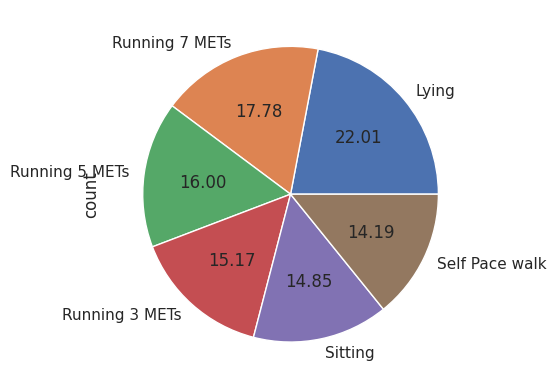

In [409]:
df1['activity'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

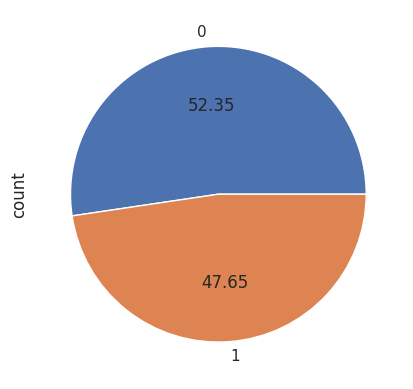

In [410]:
df1['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [411]:
df_num= df1.select_dtypes(include="number")

<Axes: >

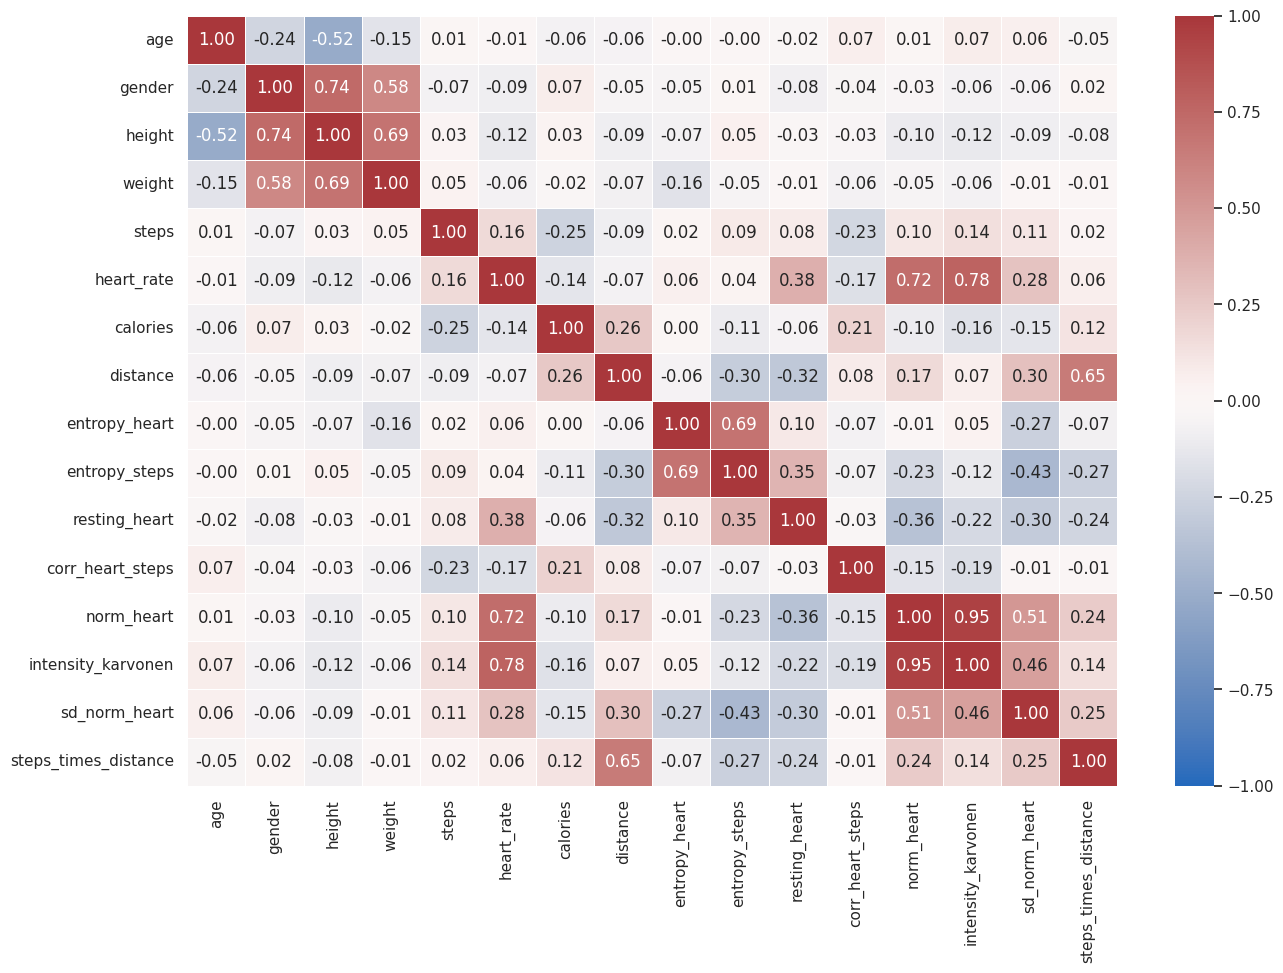

In [412]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot=True, center=0, linewidths=.5, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

<Axes: xlabel='device', ylabel='activity'>

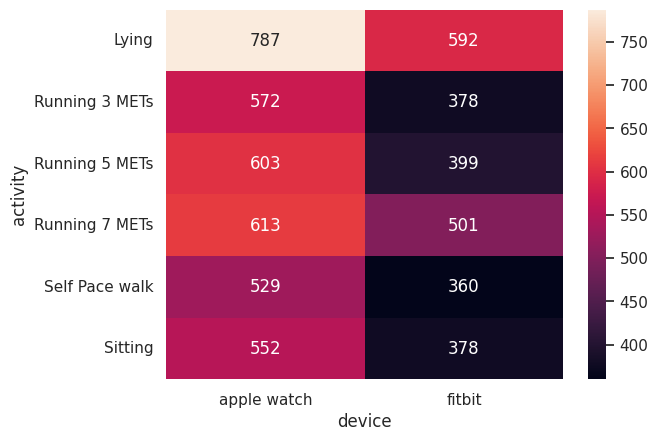

In [413]:
sns.heatmap(pd.crosstab(df1["activity"],df1["device"]),annot=True,fmt='d')

In [414]:
df1.device.value_counts()

device
apple watch    3656
fitbit         2608
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_steps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

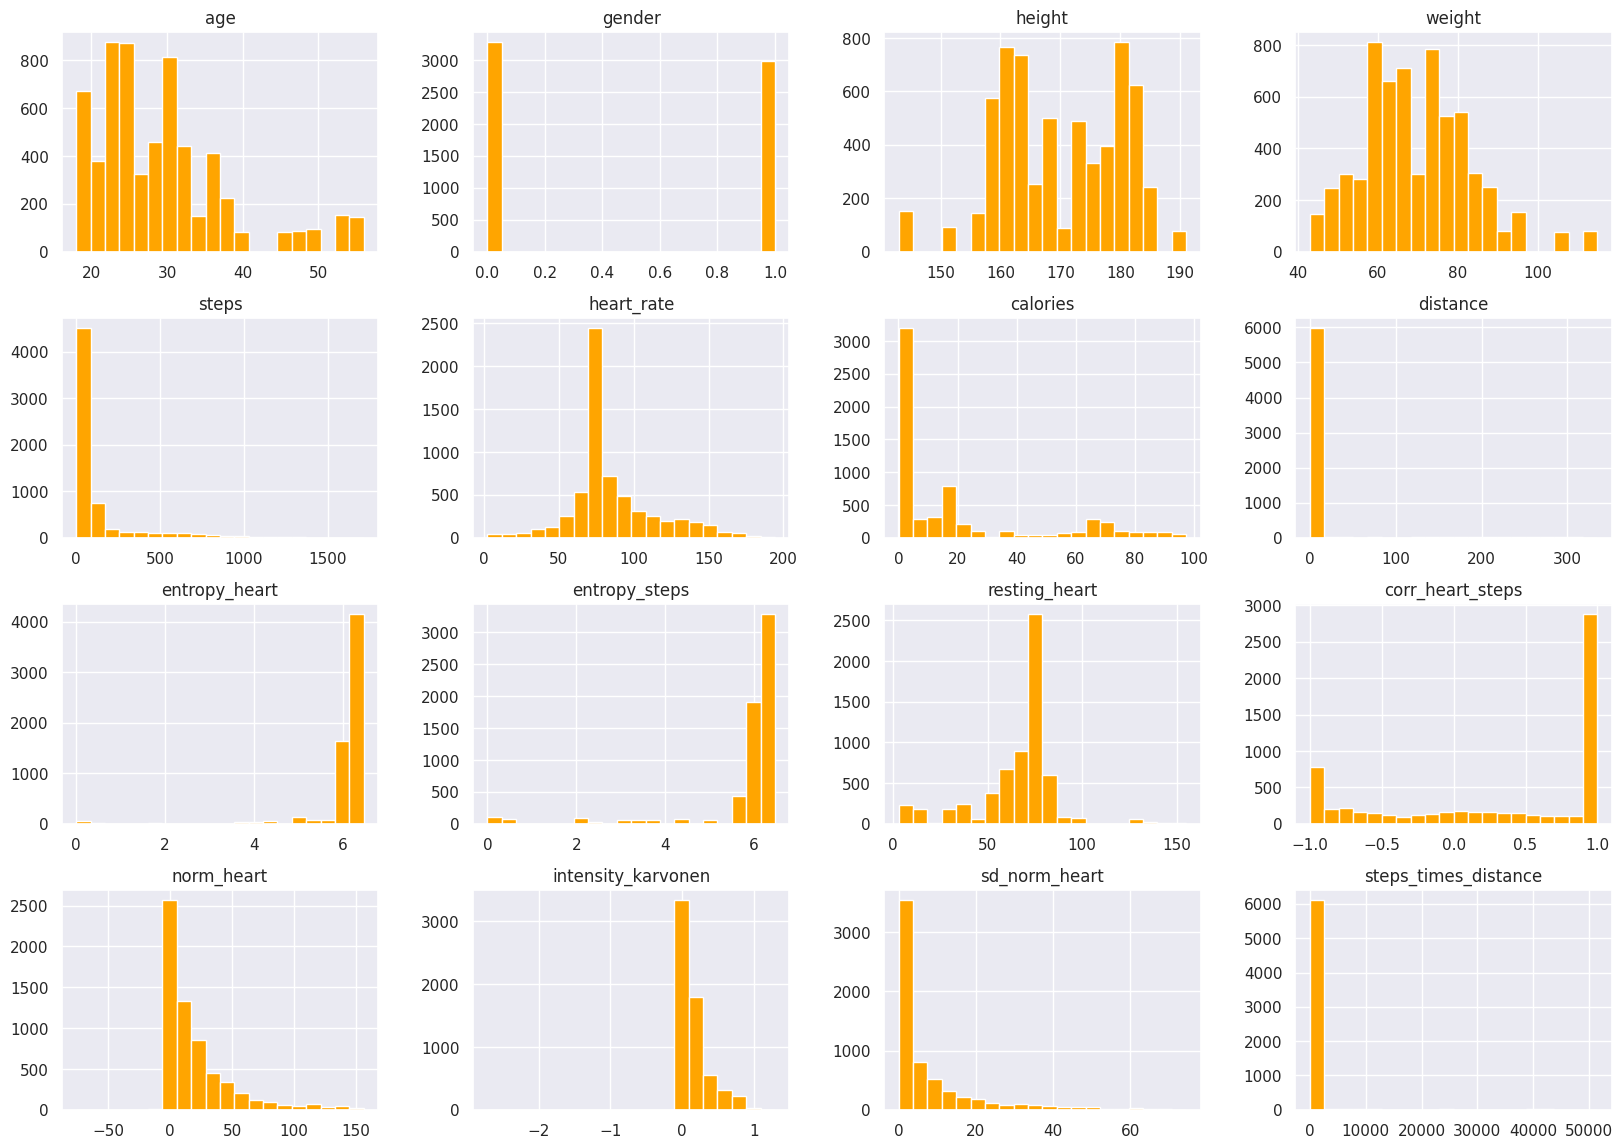

In [415]:
sns.set(font_scale = 1)

df1.hist(bins = 20, color = 'orange', figsize = (20, 14))

## Feature Engineering

### Create a unique identifyer for each participant

In [416]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_steps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance', 'device', 'activity'],
      dtype='object')

In [417]:
df1.insert(loc=0, column='participant_id', value = df1.set_index(['age', 'gender', 'height', 'weight']).index.factorize()[0]+1)

In [418]:
df1

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [419]:
df1.groupby('participant_id').count()

,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
participant_id,,,,,,,,,,,,,,,,,,
1,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140
2,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
3,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
4,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
5,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
6,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
7,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
8,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
9,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148


In [420]:
df1['bmi'] = round(df1.weight / (df1.height/100)**2)
df1.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,23.0


### Pairplot with core features

In [421]:
df1.columns

Index(['participant_id', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity', 'bmi'],
      dtype='object')

In [422]:
df1_core_features = df1[['participant_id','age', 'gender', 'height','weight', 'steps', 'heart_rate', 'calories', 'distance', 'bmi']]

df1_core_features

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,bmi
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,23.0
1,1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,23.0
2,1,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,23.0
3,1,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,23.0
4,1,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,23.0
...,...,...,...,...,...,...,...,...,...,...
6259,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6260,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6261,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0
6262,49,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,29.0


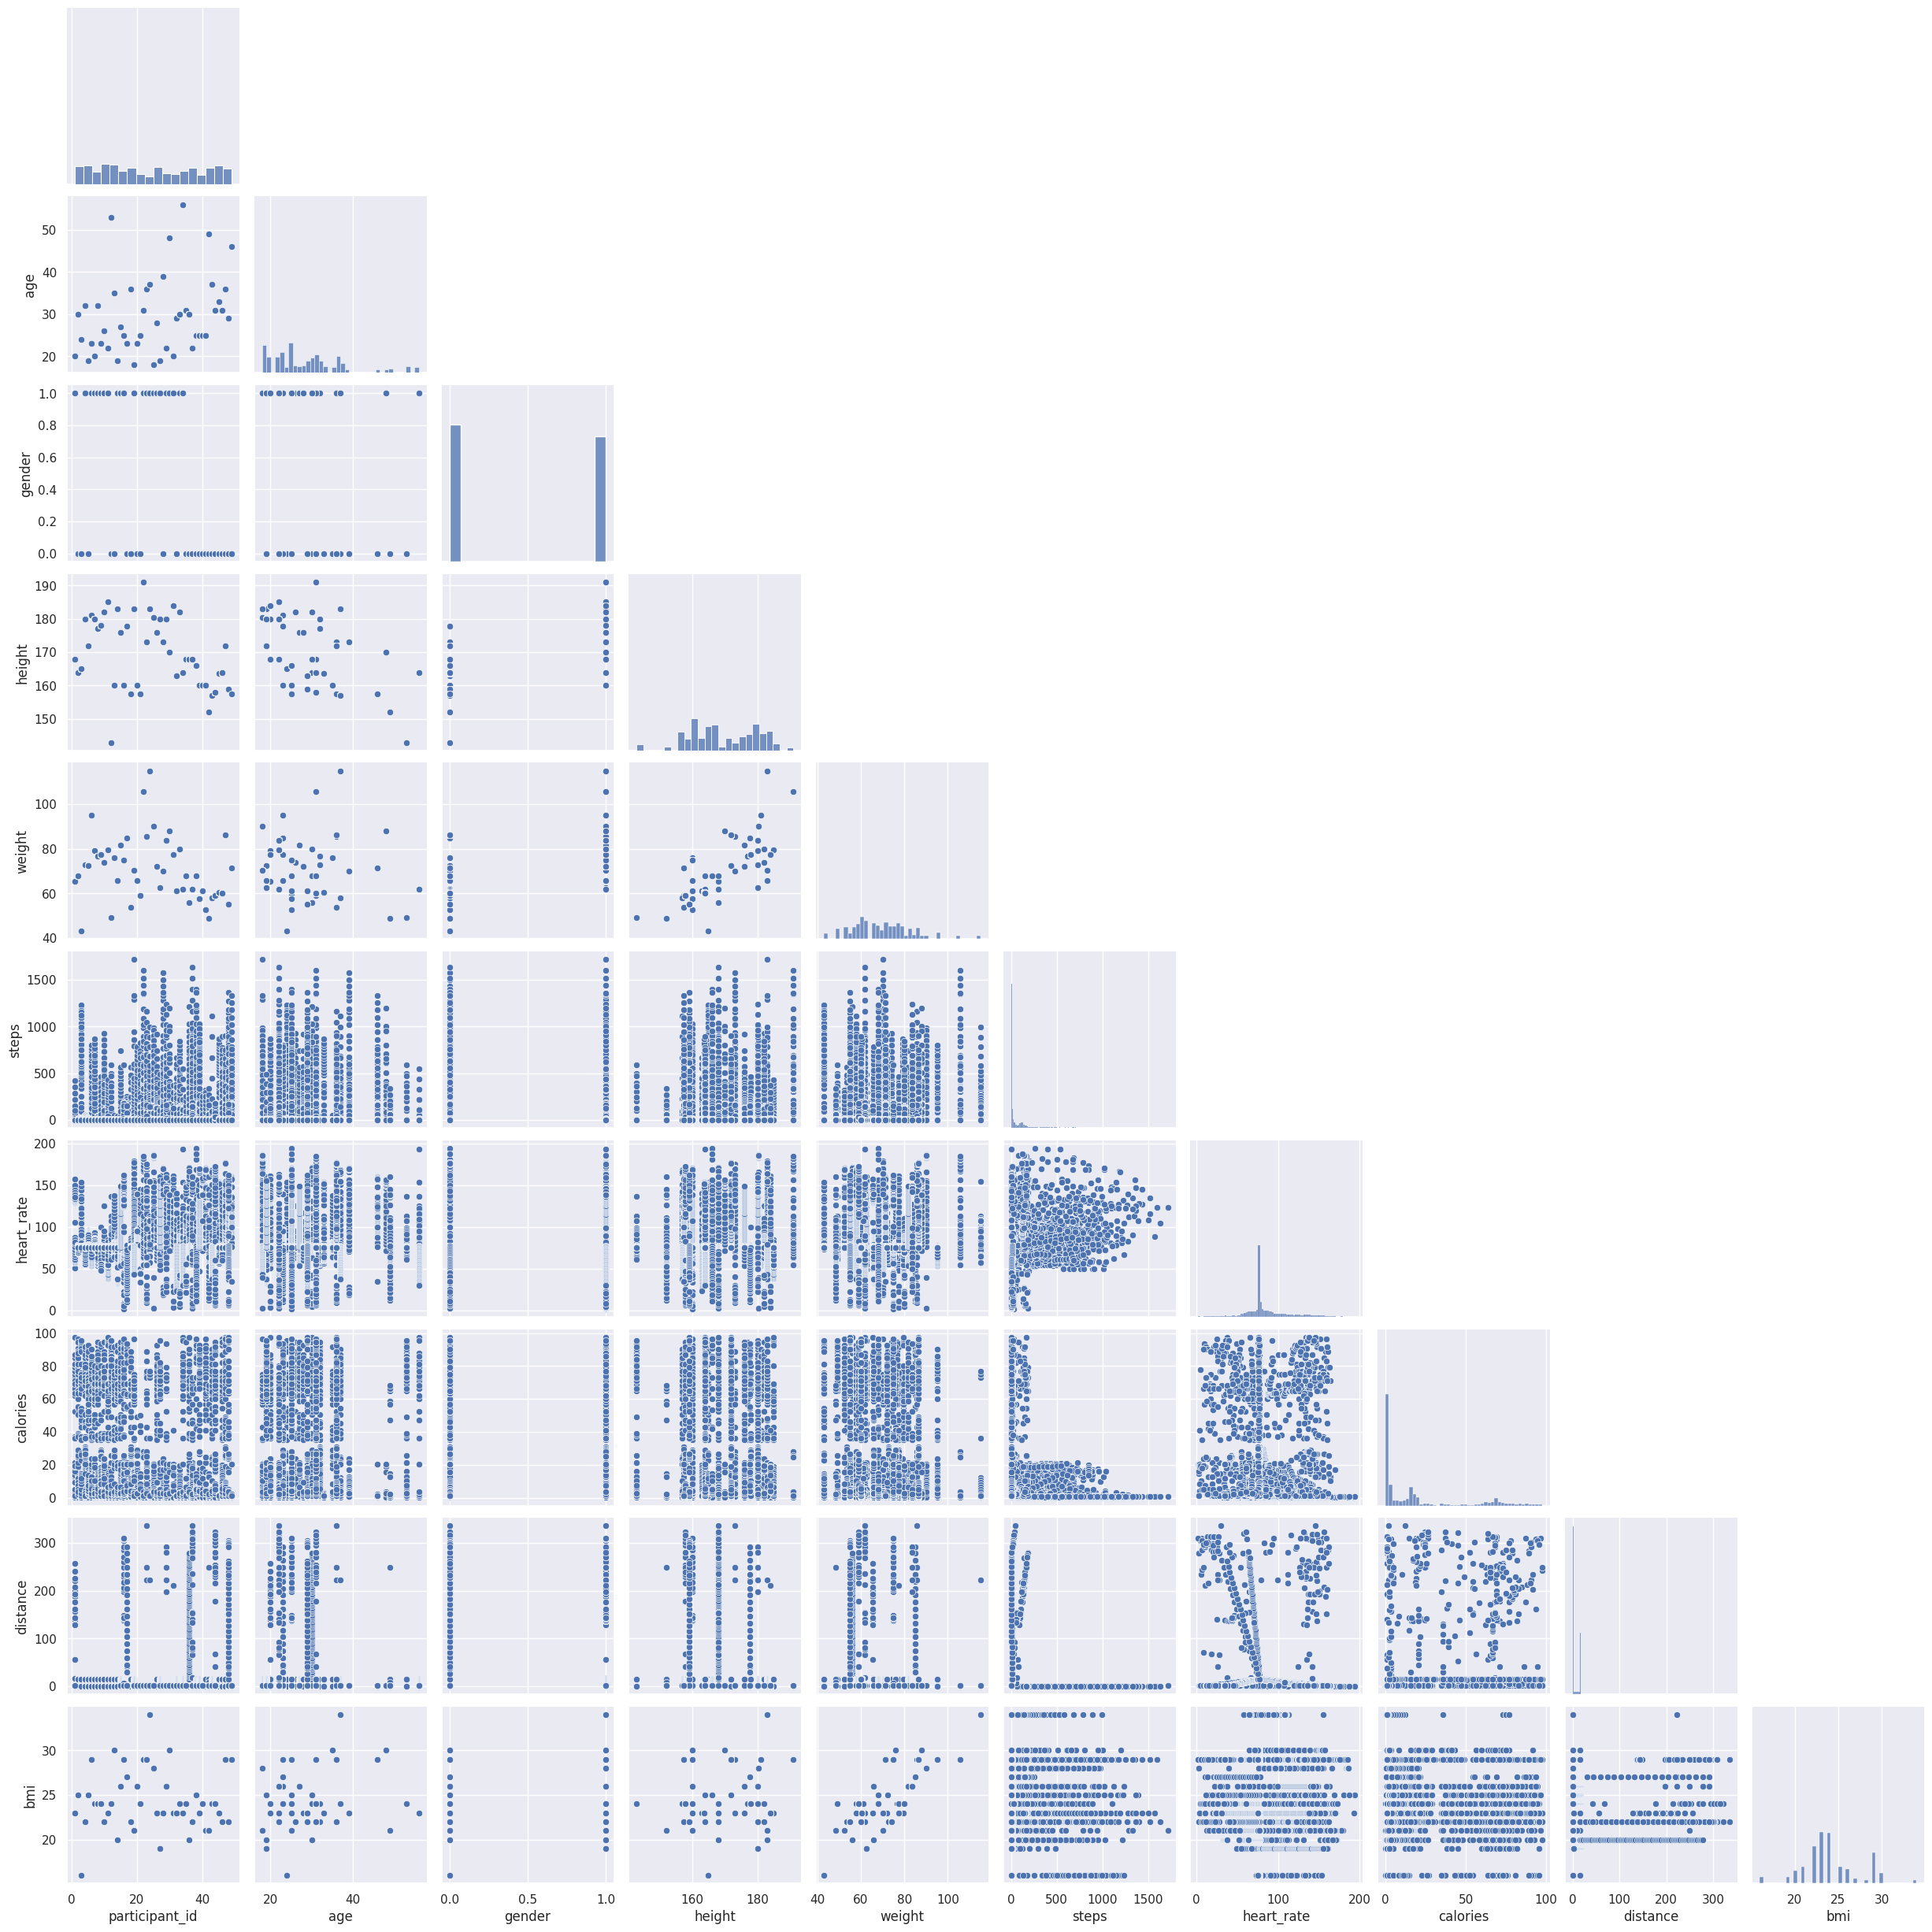

In [423]:
sns.pairplot(df1_core_features, corner = True)

## Features and Target Split

In [424]:
df1_apple = df1[df1['device']=='apple watch']
df1_fitbit = df1[df1['device']=='fitbit']

In [425]:
X_apple = df1_apple.drop(columns = 'activity').drop(columns="device")
y_apple = df1_apple['activity']

X_fitbit = df1_fitbit.drop(columns = 'activity').drop(columns="device")
y_fitbit = df1_fitbit['activity']


## Lable Encoding of Target Value

In [426]:
from sklearn.preprocessing import LabelEncoder

In [427]:
y_apple.unique()

array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [428]:
label_encoder_apple = LabelEncoder()
label_encoder_apple.fit(y_apple)
y_apple_encoded = label_encoder_apple.transform(y_apple)

In [429]:
y_apple

0                Lying
1                Lying
2                Lying
3                Lying
4                Lying
             ...      
3651    Running 7 METs
3652    Running 7 METs
3653    Running 7 METs
3654    Running 7 METs
3655    Running 7 METs
Name: activity, Length: 3656, dtype: object

In [430]:
y_fitbit.unique()

array(['Lying', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs',
       'Sitting', 'Running 7 METs'], dtype=object)

In [431]:
label_encoder_fitbit = LabelEncoder()
label_encoder_fitbit.fit(y_fitbit)
y_fitbit_encoded = label_encoder_fitbit.transform(y_fitbit)

## Features scaling

In [432]:
from sklearn.preprocessing import StandardScaler

In [433]:
scaler_apple = StandardScaler()
df_scaled_apple = pd.DataFrame(scaler_apple.fit_transform(X_apple),columns= scaler_apple.get_feature_names_out())
df_scaled_apple.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.629081,-0.475505,-0.747423,-0.554538,0.453628,0.356003,-0.785936,1.340947,-0.139579,-0.258063,-0.778833,-0.352083,-0.400188
1,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.626468,-0.478417,-0.343014,-0.550378,0.453628,0.356003,-0.785936,1.340947,-0.142830,-0.260757,-0.778833,-0.351973,-0.400188
2,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.623855,-0.475149,0.508426,-0.546218,0.453628,0.356003,-0.785936,1.340947,-0.139181,-0.257734,-0.778833,-0.351856,-0.400188
3,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.621242,-0.471880,0.600567,-0.542057,0.453628,0.356003,-0.785936,1.340947,-0.135533,-0.254710,-0.778833,-0.351731,-0.400188
4,-1.695677,-1.0411,1.054549,-0.180264,-0.369017,-0.618629,-0.468611,0.692708,-0.537897,0.453628,0.356003,-0.785936,1.317761,-0.131884,-0.251686,-0.854109,-0.351600,-0.400188


In [434]:
scaler_fitbit = StandardScaler()
df_scaled_fitbit = pd.DataFrame(scaler_fitbit.fit_transform(X_fitbit),columns= scaler_fitbit.get_feature_names_out())
df_scaled_fitbit.head()

,participant_id,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,bmi
0,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.787256,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.452279,-0.395318,-0.398064,-0.218929,-0.212811
1,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.813474,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.428906,-0.341733,-0.398064,-0.218929,-0.212811
2,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.716091,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.515718,-0.540761,-0.398064,-0.218929,-0.212811
3,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.690942,-1.142800,-0.482252,0.034291,-1.688549,2.322448,0.447976,-0.538136,-0.592158,-0.398064,-0.218929,-0.212811
4,-1.443091,-1.010975,1.039108,-0.1445,-0.228768,-0.373905,1.873403,-1.066937,-0.482252,0.034291,-1.688549,2.322448,-2.006431,-0.375484,-0.219255,-0.373966,-0.218929,-0.212811


## Train-Split Data(Apple Watch and Fitbit)

In [435]:
from sklearn.model_selection import train_test_split

In [436]:
X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple, y_apple_encoded, test_size=0.2, random_state=42)

In [437]:
X_train_apple.shape

(2924, 18)

In [438]:
X_test_apple.shape

(732, 18)

In [439]:
X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit, y_fitbit_encoded, test_size=0.2, random_state=42)

# Predictive Model

1. Train Random Forest model for Apple Watch data and make prediction

In [440]:
from sklearn.ensemble import RandomForestClassifier

rf_model_apple = RandomForestClassifier(n_estimators=100, random_state=42)

In [441]:
# Fit the model
rf_model_apple.fit(X_train_apple, y_train_apple)

RandomForestClassifier(random_state=42)

In [442]:
# Prediction
y_pred_apple = rf_model_apple.predict(X_test_apple)

2. Train Random Forest model for Fitbit data and make prediction

In [443]:
rf_model_fitbit = RandomForestClassifier(n_estimators=100, random_state=42)

In [444]:
# Fit the model
rf_model_fitbit.fit(X_train_fitbit, y_train_fitbit)

RandomForestClassifier(random_state=42)

In [445]:
# Prediction
y_pred_fitbit = rf_model_fitbit.predict(X_test_fitbit)

In [446]:
# Calculate accuracy scores for Apple Watch and Fitbit separately
accuracy_apple = accuracy_score(y_test_apple, y_pred_apple)
accuracy_fitbit = accuracy_score(y_test_fitbit, y_pred_fitbit)

print("Accuracy for Apple Watch:", accuracy_apple)
print("Accuracy for Fitbit:", accuracy_fitbit)

Accuracy for Apple Watch: 0.8415300546448088
Accuracy for Fitbit: 0.89272030651341


In [447]:
# Predictive Model with core features
#core_col = df1_core_features.columns[1:]
#core_col

In [448]:
#X_train_apple, X_test_apple, y_train_apple, y_test_apple = train_test_split(df_scaled_apple[core_col], y_apple_encoded, test_size=0.2, random_state=42)

In [449]:
#X_train_fitbit, X_test_fitbit, y_train_fitbit, y_test_fitbit = train_test_split(df_scaled_fitbit[core_col], y_fitbit_encoded, test_size=0.2, random_state=42)

# Use of Shapley values to explain individual predictions and to interpret the importance of features in our model 

View the feature importance and confusion matrix to get a basic impression of the model
Just to understand where we stand with the feature importance and to compute the impurity decrease within each tree

Text(0.5, 0, 'Relative Importance')

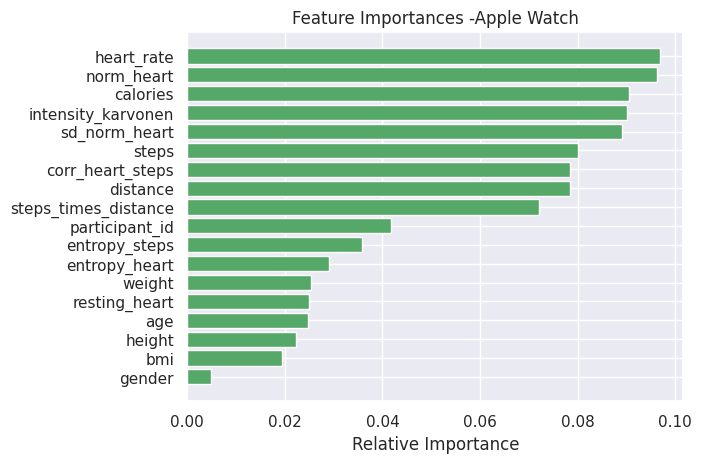

In [453]:
# For Apple Watch
importances = rf_model_apple.feature_importances_
indices = np.argsort(importances)
# features = df1_apple.columns
features = X_train_apple.columns
plt.title('Feature Importances -Apple Watch')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

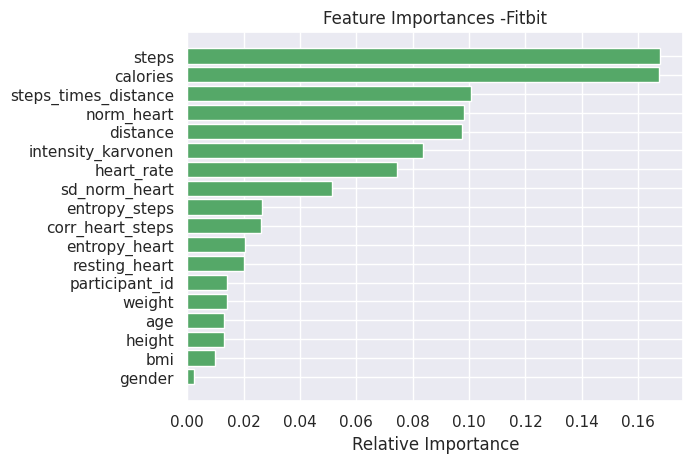

In [454]:
# For Fitbit
importances = rf_model_fitbit.feature_importances_
indices = np.argsort(importances)
#features = df1_fitbit.columns
features = X_train_fitbit.columns
plt.title('Feature Importances -Fitbit')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

# Confusion matrix 
to visualize the performance of my model and more important to see where the model fails exactly

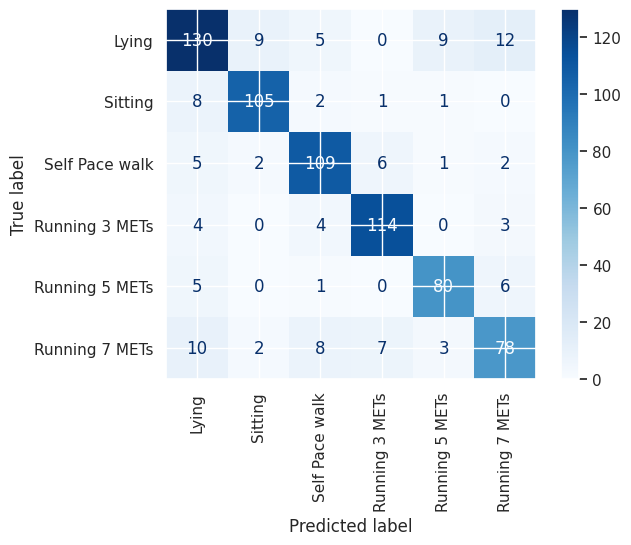

In [455]:
# Compute the confusion matrix for Apple Watch
cm_apple = confusion_matrix(y_test_apple, y_pred_apple)

class_names = ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']

# Create ConfusionMatrixDisplay object
cm_display_apple = ConfusionMatrixDisplay(confusion_matrix=cm_apple, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_apple.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

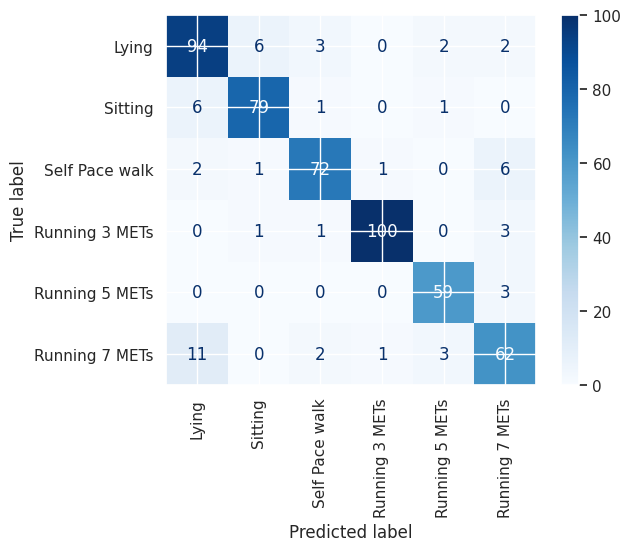

In [456]:
# Compute the confusion matrix for Fitbit
cm_fitbit = confusion_matrix(y_test_fitbit, y_pred_fitbit)

class_names = ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']

# Create ConfusionMatrixDisplay object
cm_display_fitbit = ConfusionMatrixDisplay(confusion_matrix=cm_fitbit, display_labels=class_names)

# Plot confusion matrix using ConfusionMatrixDisplay
cm_display_fitbit.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

In [ ]:
# For Fitbit
class_names = ['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs']
disp_fitbit = plot_confusion_matrix(cls_fb, X_test_fitbit, y_test_fitbit, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical')

# SHAP Summary Plot
SHAP values of a model’s output explain how features impact the output of the model

In [ ]:
# compute SHAP values for Apple Watch
explainer = shap.TreeExplainer(cls)
shap_values_apple = explainer.shap_values(X_train_apple)

In [ ]:
# Now we can plot relevant plots that will help us analyze the model for Apple Watch
shap.summary_plot(shap_values_apple, X_train_apple.values, plot_type="bar", class_names= class_names, feature_names = X_train_apple.columns)

In [ ]:
# compute SHAP values for Fitbit
shap_values_fitbit = explainer.shap_values(X_train_fitbit)

In [ ]:
# Now we can plot relevant plots that will help us analyze the model for Fitbit
shap.summary_plot(shap_values_fitbit, X_train_fitbit.values, plot_type="bar", class_names= class_names, feature_names = X_train_fitbit.columns)

In [ ]:
#Let's also see the summary_plot of a specific class for Apple Watch
shap.summary_plot(shap_values_apple[1], X_train_apple.values, feature_names = X_train_apple.columns)

In [ ]:
#Let's also see the summary_plot of a specific class for Fitbit
shap.summary_plot(shap_values_fitbit[1], X_train_fitbit.values, feature_names = X_train_fitbit.columns)